In [50]:
%matplotlib inline

from blockchain import statistics
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

import matplotlib
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<h3> Glossary </h3> 
<p> DT = DAILY TRANSACTIONS</p>
<P> DUA = DAILY UNIQUE ADRESSES </P>
<P> DTV = DAILY TRANSACTION VOLUME </P>
<P> DDTV = DAILY DOLLAR TRANSACTION VOLUME </P>
<p> BIC = BITCOIN IN CIRCULATION </p>
<p> MP = MARKET PRICE </p>

In [3]:
DT_get = requests.get("https://blockchain.info/charts/n-transactions?timespan=all&format=json")
DUA_get = requests.get("https://blockchain.info/charts/n-unique-addresses?timespan=all&format=json")
DTV_get = requests.get("https://blockchain.info/charts/estimated-transaction-volume?timespan=all&format=json")
DDTV_get = requests.get("https://blockchain.info/charts/estimated-transaction-volume-usd?timespan=all&format=json")
BIC_get = requests.get("https://blockchain.info/charts/total-bitcoins?timespan=all&format=json")
MP_get = requests.get("https://blockchain.info/charts/market-price?timespan=all&format=json")

In [4]:
DT_json = DT_get.json()
DUA_json = DUA_get.json()
DTV_json = DTV_get.json()
DDTV_json = DDTV_get.json()
BIC_json = BIC_get.json()
MP_json = MP_get.json()

In [18]:
DT_json['values']

[{'x': 1230940800, 'y': 1},
 {'x': 1231113600, 'y': 0},
 {'x': 1231286400, 'y': 0},
 {'x': 1231459200, 'y': 14},
 {'x': 1231632000, 'y': 106},
 {'x': 1231804800, 'y': 116},
 {'x': 1231977600, 'y': 136},
 {'x': 1232150400, 'y': 109},
 {'x': 1232323200, 'y': 120},
 {'x': 1232496000, 'y': 115},
 {'x': 1232668800, 'y': 68},
 {'x': 1232841600, 'y': 195},
 {'x': 1233014400, 'y': 105},
 {'x': 1233187200, 'y': 122},
 {'x': 1233360000, 'y': 129},
 {'x': 1233532800, 'y': 127},
 {'x': 1233705600, 'y': 126},
 {'x': 1233878400, 'y': 129},
 {'x': 1234051200, 'y': 135},
 {'x': 1234224000, 'y': 127},
 {'x': 1234396800, 'y': 119},
 {'x': 1234569600, 'y': 141},
 {'x': 1234742400, 'y': 123},
 {'x': 1234915200, 'y': 124},
 {'x': 1235088000, 'y': 129},
 {'x': 1235260800, 'y': 125},
 {'x': 1235433600, 'y': 111},
 {'x': 1235606400, 'y': 96},
 {'x': 1235779200, 'y': 103},
 {'x': 1235952000, 'y': 104},
 {'x': 1236124800, 'y': 106},
 {'x': 1236297600, 'y': 119},
 {'x': 1236470400, 'y': 115},
 {'x': 1236643200, 

In [38]:
type(DT_json)
#Prep_y = pd.DataFrame(list(x.values())[1])

dict

In [19]:
DT = pd.DataFrame(DT_json['values'])
DT.columns = ['Date', 'Transactions']

DUA = pd.DataFrame(DUA_json['values'])
DUA.columns = ['Date', 'UniqueAdresses']
DUA = DUA.drop('Date', axis=1)

DTV = pd.DataFrame(DTV_json['values'])
DTV.columns = ['Date', 'TransactionVolume']
DTV = DTV.drop('Date', axis=1)

DDTV = pd.DataFrame(DDTV_json['values'])
DDTV.columns = ['Date', 'DailyDollarTransactionVolume']
DDTV = DDTV.drop('Date', axis=1)

BIC = pd.DataFrame(BIC_json['values'])
BIC.columns = ['Date', 'BitCoinInCirculation']
BIC = BIC.drop('Date', axis=1)

MP = pd.DataFrame(MP_json['values'])
MP.columns = ['Date', 'MarketPrice']
MP = MP.drop('Date', axis=1)


In [20]:
DataSet = pd.concat([DT, DUA], axis=1)
DataSet = pd.concat([DataSet, DTV], axis=1)
DataSet = pd.concat([DataSet, DDTV], axis=1)
DataSet = pd.concat([DataSet, BIC], axis=1)
DataSet = pd.concat([DataSet, MP], axis=1)
DataSet['Date'] = pd.to_datetime(DataSet['Date'],unit='s')
DataSet

,Date,Transactions,UniqueAdresses,TransactionVolume,DailyDollarTransactionVolume,BitCoinInCirculation,MarketPrice
0,2009-01-03,1,1,0.000,0.000,50.000,0.000
1,2009-01-05,0,0,0.000,0.000,50.000,0.000
2,2009-01-07,0,0,0.000,0.000,50.000,0.000
3,2009-01-09,14,14,0.000,0.000,750.000,0.000
4,2009-01-11,106,106,0.000,0.000,7600.000,0.000
5,2009-01-13,116,117,10.000,0.000,17800.000,0.000
6,2009-01-15,136,136,414.000,0.000,30450.000,0.000
7,2009-01-17,109,109,100.000,0.000,41650.000,0.000
8,2009-01-19,120,120,150.000,0.000,52650.000,0.000
9,2009-01-21,115,115,500.000,0.000,64100.000,0.000


In [21]:
DataSet = DataSet.drop('DailyDollarTransactionVolume', axis = 1)

In [22]:
DataSet.describe()

,Transactions,UniqueAdresses,TransactionVolume,BitCoinInCirculation,MarketPrice
count,1562.000,1562.000,1562.000,1562.000,1562.000
mean,77261.199,141075.351,173852.353,9764653.345,286.298
std,91816.068,171317.458,244183.952,5145650.266,451.728
min,0.000,0.000,0.000,50.000,0.000
25%,1921.500,2706.500,50376.250,5492712.500,0.850
50%,48182.500,50918.500,145535.000,11029450.000,90.015
75%,109764.500,229342.500,242260.750,14229800.000,434.255
max,367710.000,687290.000,5313161.000,16463500.000,2898.180


In [23]:
DataSet.corr()

,Transactions,UniqueAdresses,TransactionVolume,BitCoinInCirculation,MarketPrice
Transactions,1.000,0.987,0.294,0.802,0.763
UniqueAdresses,0.987,1.000,0.279,0.804,0.796
TransactionVolume,0.294,0.279,1.000,0.352,0.168
BitCoinInCirculation,0.802,0.804,0.352,1.000,0.624
MarketPrice,0.763,0.796,0.168,0.624,1.000


<h3> Transactions vs MarketPrice </h3>

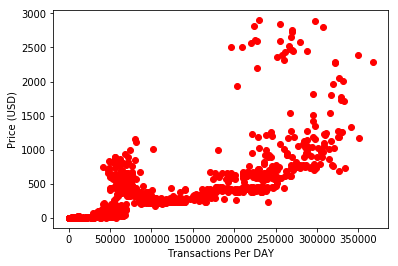

In [24]:
plt.plot(DataSet.Transactions, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('Transactions Per DAY')
plt.show()

<h3> UniqueAdresses vs MarketPrice</h3>

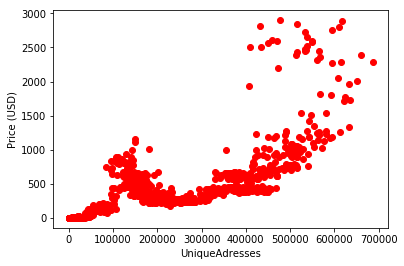

In [25]:
plt.plot(DataSet.UniqueAdresses,DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('UniqueAdresses')
plt.show()

<h3> TransactionVolume vs MarketPrice</h3>

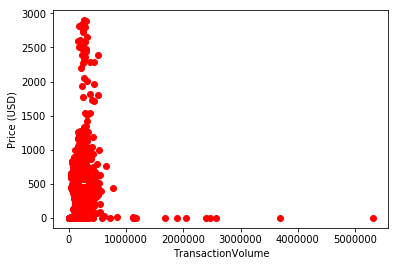

In [26]:
plt.plot(DataSet.TransactionVolume, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('TransactionVolume')
plt.show()

<h3> BitCoinInCirculation vs MarketPrice</h3>

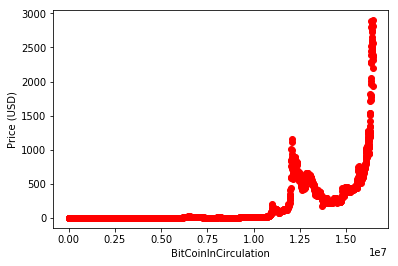

In [27]:
plt.plot(DataSet.BitCoinInCirculation, DataSet.MarketPrice, 'ro')
plt.ylabel('Price (USD)')
plt.xlabel('BitCoinInCirculation')
plt.show()

# FEATURE CREATION

<h3> Bollinger Bands </h3> 

In [29]:
Market_Price = DataSet[['Date','MarketPrice']]

In [34]:
Market_Price.columns = ['Date','Close']

In [57]:
#Bollinger Bands  
def BBANDS(df, n):  
    MA = pd.Series(pd.rolling_mean(df['Close'], n))  
    MSD = pd.Series(pd.rolling_std(df['Close'], n))  
    b1 = MA + 2*MSD 
    B1 = pd.Series(b1, name = 'BollingerB_' + str(n))  
    df = df.join(B1)  
    b2 = MA-2*MSD  
    B2 = pd.Series(b2, name = 'Bollingerb_' + str(n))  
    df = df.join(B2)  
    return df

In [58]:
bb = BBANDS(Market_Price, 10)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).std()


In [59]:
bb

,Date,Close,BollingerB_10,Bollingerb_10
0,2009-01-03,0.000,nan,nan
1,2009-01-05,0.000,nan,nan
2,2009-01-07,0.000,nan,nan
3,2009-01-09,0.000,nan,nan
4,2009-01-11,0.000,nan,nan
5,2009-01-13,0.000,nan,nan
6,2009-01-15,0.000,nan,nan
7,2009-01-17,0.000,nan,nan
8,2009-01-19,0.000,nan,nan
9,2009-01-21,0.000,0.000,0.000


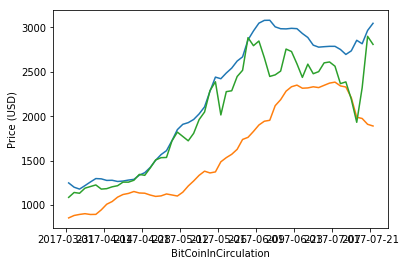

In [69]:
plot_data = bb[bb['Date'] >= '2017-04-01']
plt.plot(plot_data.Date ,plot_data.BollingerB_10)
plt.plot(plot_data.Date ,plot_data.Bollingerb_10)
plt.plot(plot_data.Date ,plot_data.Close)
plt.ylabel('Price (USD)')
plt.xlabel('BitCoinInCirculation')
plt.show()

<h3> Trix </h3>

In [72]:
#Trix  
def TRIX(df, n):  
    EX1 = pd.ewma(df['Close'], span = n, min_periods = n - 1)  
    EX2 = pd.ewma(EX1, span = n, min_periods = n - 1)  
    EX3 = pd.ewma(EX2, span = n, min_periods = n - 1)  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

In [75]:
TRIX(Market_Price,15)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=14,span=15,adjust=True).mean()
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=14,span=15,adjust=True).mean()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=14,span=15,adjust=True).mean()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in double_scala

,Date,Close,Trix_15
0,2009-01-03,0.000,0.000
1,2009-01-05,0.000,nan
2,2009-01-07,0.000,nan
3,2009-01-09,0.000,nan
4,2009-01-11,0.000,nan
5,2009-01-13,0.000,nan
6,2009-01-15,0.000,nan
7,2009-01-17,0.000,nan
8,2009-01-19,0.000,nan
9,2009-01-21,0.000,nan


<h3> MACD </h3>

In [94]:
#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(pd.ewma(df['Close'], span = n_fast, min_periods = n_slow - 1))  
    EMAslow = pd.Series(pd.ewma(df['Close'], span = n_slow, min_periods = n_slow - 1))  
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(pd.ewma(MACD, span = 9, min_periods = 8), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [95]:
macd = MACD(Market_Price,12,26)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=25,span=12,adjust=True).mean()
  app.launch_new_instance()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=25,span=26,adjust=True).mean()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=8,span=9,adjust=True).mean()


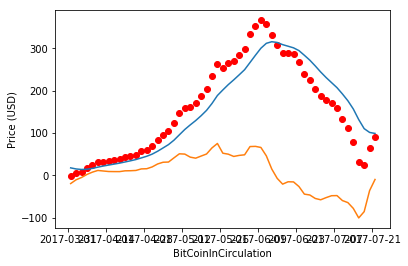

In [81]:
plot_data = macd[macd['Date'] >= '2017-04-01']
plt.plot(plot_data.Date ,plot_data.MACD_12_26, 'ro')
plt.plot(plot_data.Date ,plot_data.MACDsign_12_26)
plt.plot(plot_data.Date ,plot_data.MACDdiff_12_26)
plt.ylabel('Price (USD)')
plt.xlabel('BitCoinInCirculation')
plt.show()

<h3> KST OScillator </h3> 

In [86]:
#KST Oscillator  
def KST(df, r1, r2, r3, r4, n1, n2, n3, n4,w1,w2,w3,w4):  
    M = df['Close'].diff(r1 - 1)  
    N = df['Close'].shift(r1 - 1)  
    ROC1 = M / N  
    M = df['Close'].diff(r2 - 1)  
    N = df['Close'].shift(r2 - 1)  
    ROC2 = M / N  
    M = df['Close'].diff(r3 - 1)  
    N = df['Close'].shift(r3 - 1)  
    ROC3 = M / N  
    M = df['Close'].diff(r4 - 1)  
    N = df['Close'].shift(r4 - 1)  
    ROC4 = M / N  
    KST = pd.Series(pd.rolling_sum(ROC1, n1)*w1 + pd.rolling_sum(ROC2, n2) * w2 + pd.rolling_sum(ROC3, n3) * w3 + pd.rolling_sum(ROC4, n4) * w4, name = 'KST_' + str(r1) + '_' + str(r2) + '_' + str(r3) + '_' + str(r4) + '_' + str(n1) + '_' + str(n2) + '_' + str(n3) + '_' + str(n4))  
    df = df.join(KST)  
    return df

In [87]:
KST(Market_Price,10,15,20,30,10,10,10,15,1,2,3,4)


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).sum()
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:15: FutureWarning: pd.rolling_sum is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).sum()


,Date,Close,KST_10_15_20_30_10_10_10_15
0,2009-01-03,0.000,nan
1,2009-01-05,0.000,nan
2,2009-01-07,0.000,nan
3,2009-01-09,0.000,nan
4,2009-01-11,0.000,nan
5,2009-01-13,0.000,nan
6,2009-01-15,0.000,nan
7,2009-01-17,0.000,nan
8,2009-01-19,0.000,nan
9,2009-01-21,0.000,nan
